In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading dataset
car=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
car.shape

(205, 26)

In [4]:
car.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
car.nunique().sort_values()


fueltype              2
aspiration            2
doornumber            2
enginelocation        2
drivewheel            3
carbody               5
symboling             6
enginetype            7
cylindernumber        7
fuelsystem            8
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
CarName             147
curbweight          171
price               189
car_ID              205
dtype: int64

In [8]:
car.describe()
# Here we see difference in mean and median of price column
#mean=13276.710571
#median(50%)=10295.000000

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


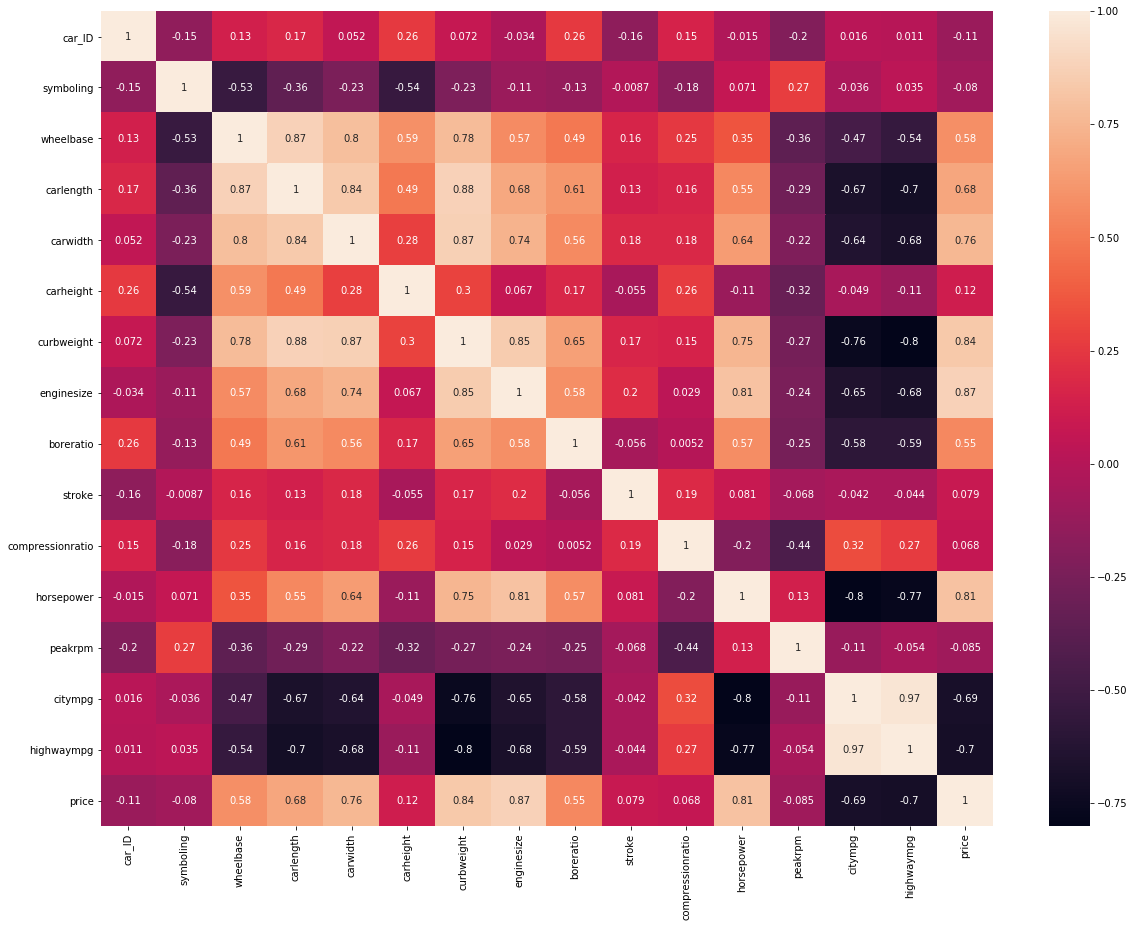

In [9]:
plt.figure(figsize = (20,15))  
sns.heatmap(car.corr(),annot = True)

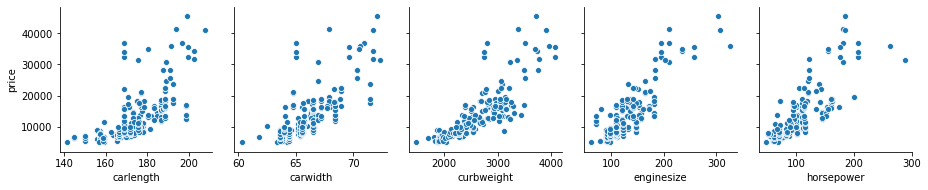

In [10]:
# plotting graphs for numeric variables which are highly correlated as shown above to see if atleast 1 linear model exists 
car_vars=['carlength','carwidth','curbweight','enginesize','horsepower']
sns.pairplot(car, x_vars=car_vars, y_vars='price',  kind='scatter')
plt.show()
# From below graph we can see linear relationship for many variables. so we are good to proceed with Linear Regression

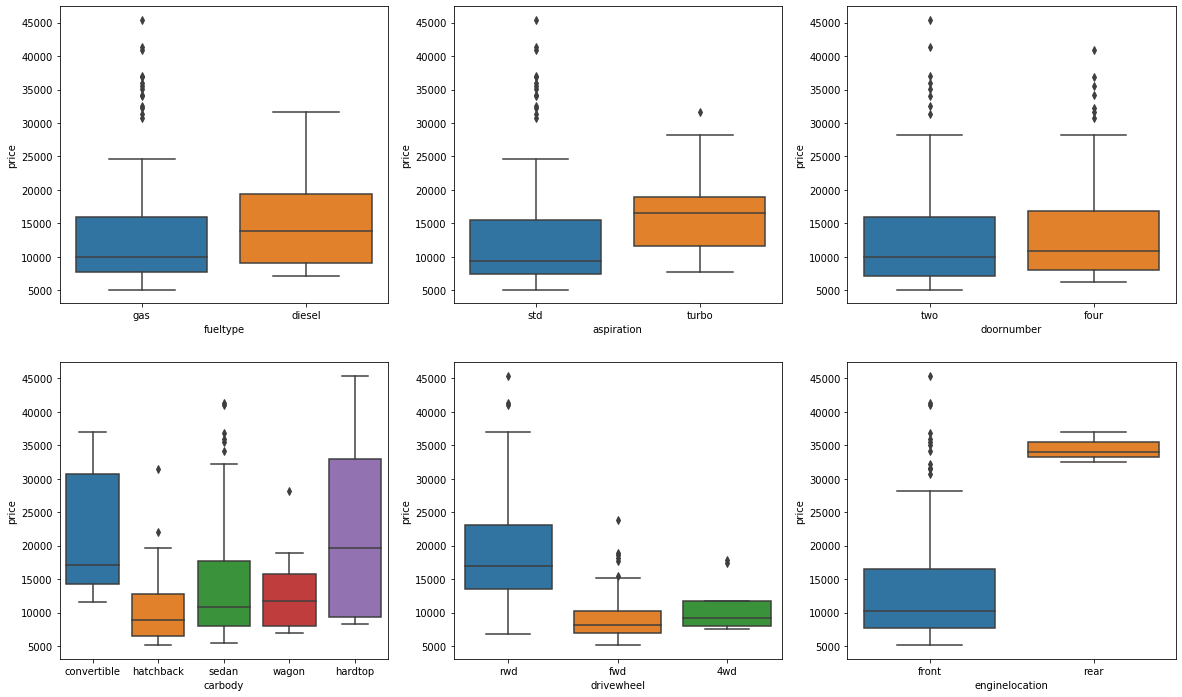

In [11]:
# Visualizing Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.show()
# For enginelocation variable we see cosiderable difference. For front, 75% of cars price range below 15000 
# for rear price range starts above 30000

# Data Preparation

In [12]:
#deriving company name from car name and dropping existing one
car['CompName']=car['CarName'].apply(lambda x:x.split()[0])
car.drop("CarName",axis=1,inplace=True)
car.head(2)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero


In [13]:
car["CompName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# correcting spelling errors 
car["CompName"].replace("Nissan","nissan",inplace=True)
car["CompName"].replace("maxda","mazda",inplace=True)
car["CompName"].replace("porcshce","porsche",inplace=True)
car["CompName"].replace("toyouta","toyota",inplace=True)
car["CompName"].replace("vokswagen","volkswagen",inplace=True)
car["CompName"].replace("vokswagen","volkswagen",inplace=True)
car["CompName"].replace("vw","volkswagen",inplace=True)


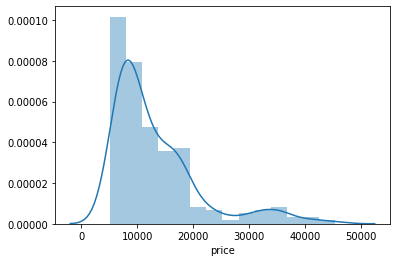

In [15]:
# checking price distribution plot
sns.distplot(car["price"])
# here we see most of the prices are below 20000

In [16]:
car["price"].describe()
# Here we see consierable difference between mean and median
#mean=13276.710571
#median=10295.000000

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [17]:
car["price"].describe(percentiles=[0.25,0.50,0.75,0.8,0.85,0.9,0.95,0.99])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
80%      17493.800000
85%      18500.000000
90%      22563.000000
95%      32472.400000
99%      40802.720000
max      45400.000000
Name: price, dtype: float64

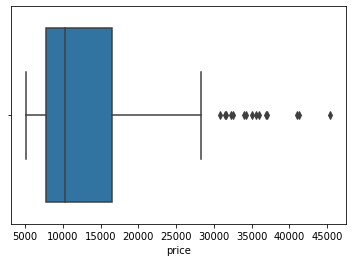

In [18]:
sns.boxplot(car["price"])

## Univariate Analysis

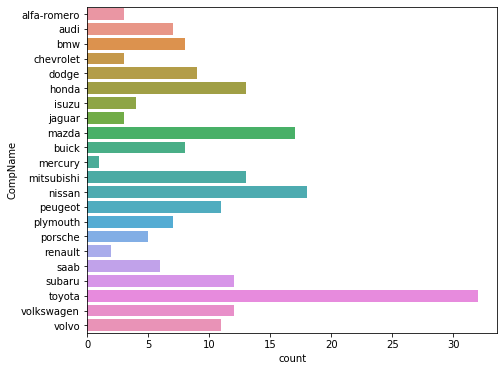

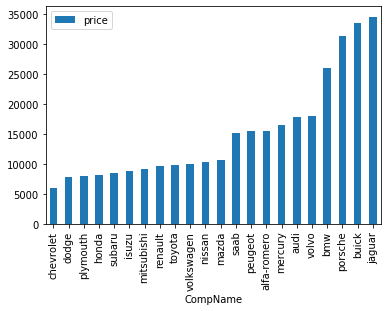

In [19]:
#Analysing Company name
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.countplot(y=car["CompName"])
# CompName vs Price
df=pd.DataFrame(car.groupby("CompName")["price"].mean().sort_values())
df.plot(kind="bar")
#Toyota is most preferred car
# Till maazda prices are even but there is sudden hike from saab to porsche. 
#We can check how many cars/data points available for these cars?

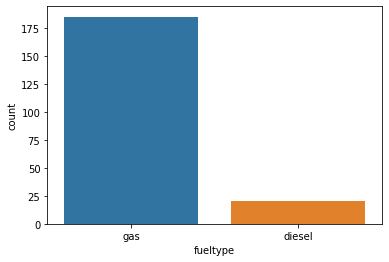

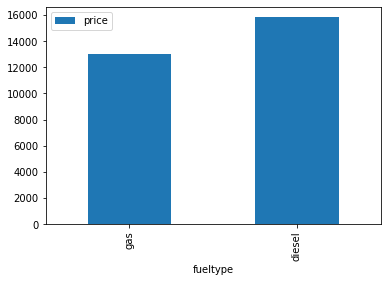

In [20]:
# Analysing Fuel type
sns.countplot(car["fueltype"])
# Fuel type vs Price

df=pd.DataFrame(car.groupby("fueltype")["price"].mean().sort_values())
df.plot(kind="bar")
# No. of cars with gas fueltype are more than diesel
# Not much insights from price vs fueltype

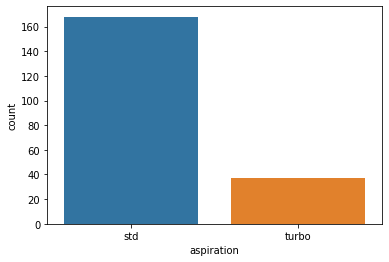

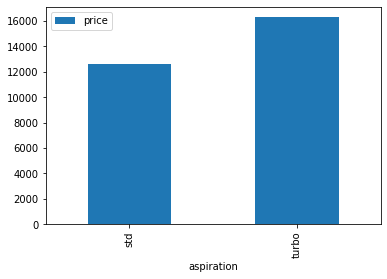

In [21]:
# Analysing aspiration
sns.countplot(car["aspiration"])
# aspiration vs Price
df=pd.DataFrame(car.groupby("aspiration")["price"].mean().sort_values())
df.plot(kind="bar")
# No of cars with aspiration "std" are more than "turbo". This may be because price for turbo are higher  as shown below

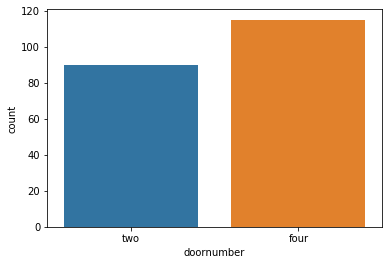

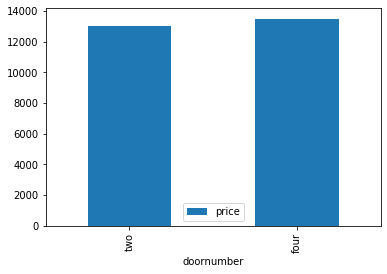

In [22]:
# Analysing doornumber
sns.countplot(car["doornumber"])
# doornumber vs Price
df=pd.DataFrame(car.groupby("doornumber")["price"].mean().sort_values())
df.plot(kind="bar")
# not much insghts from this

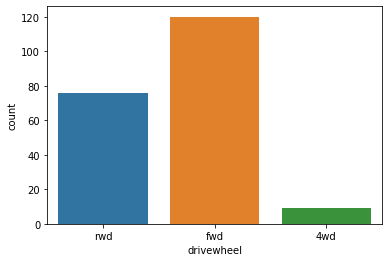

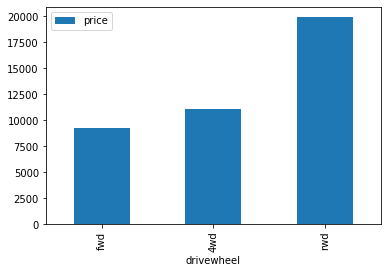

In [23]:
# Analysing drivewheel
sns.countplot(car["drivewheel"])
# drivewheel vs Price
df=pd.DataFrame(car.groupby("drivewheel")["price"].mean().sort_values())
df.plot(kind="bar")
# no. of cars with "fwd" drivewheel are higher
# price for cars with "rwd" are higher than others

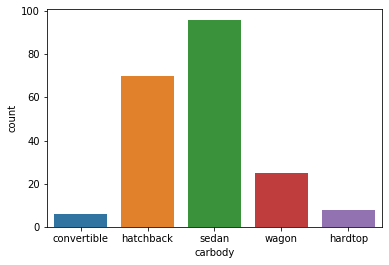

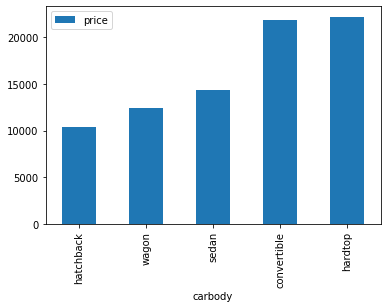

In [24]:
# Analysing carbody
sns.countplot(car["carbody"])
# carbody vs Price
df=pd.DataFrame(car.groupby("carbody")["price"].mean().sort_values())
df.plot(kind="bar")
# Sedan is the most preferred type
# price for convertible and hardtop are higher 

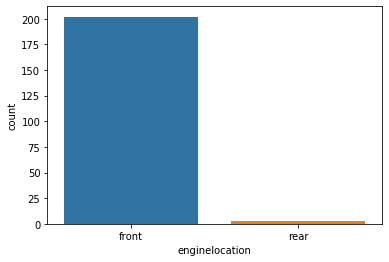

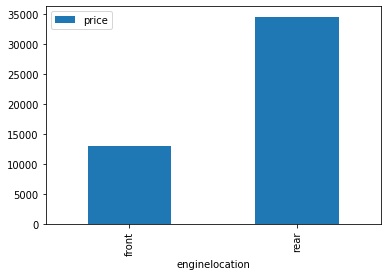

In [25]:
# Analysing enginelocation    
sns.countplot(car["enginelocation"])
# enginelocation vs Price
df=pd.DataFrame(car.groupby("enginelocation")["price"].mean().sort_values())
df.plot(kind="bar")
# Most of the cars have enginelocation in the front
# Price of cars with rear enginelocation are more

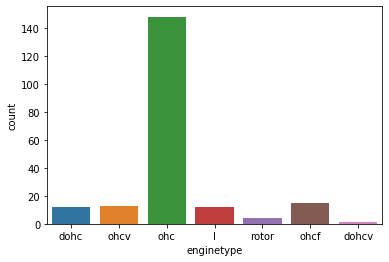

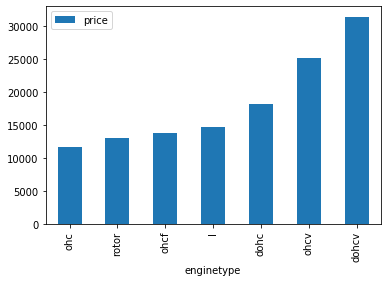

In [26]:
# Analysing enginetype    
sns.countplot(car["enginetype"])
# enginetype vs Price
df=pd.DataFrame(car.groupby("enginetype")["price"].mean().sort_values())
df.plot(kind="bar")

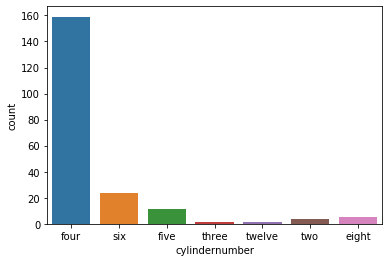

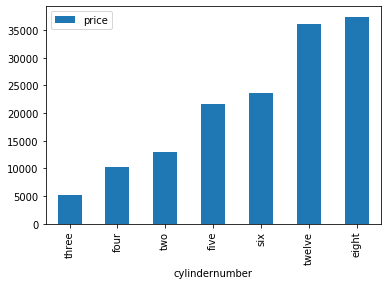

In [27]:
# Analysing cylindernumber    
sns.countplot(car["cylindernumber"])
# cylindernumber vs Price
df=pd.DataFrame(car.groupby("cylindernumber")["price"].mean().sort_values())
df.plot(kind="bar")

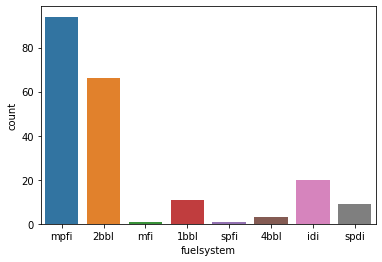

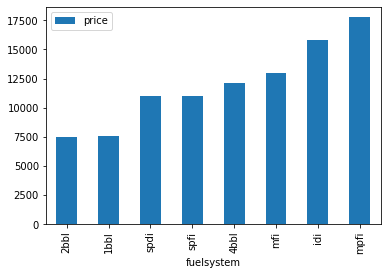

In [28]:
# Analysing fuelsystem    
sns.countplot(car["fuelsystem"])
# fuelsystem vs Price
df=pd.DataFrame(car.groupby("fuelsystem")["price"].mean().sort_values())
df.plot(kind="bar")

In [29]:
# Converting binary categorical variables to 0's and 1's
car["fueltype"] =car["fueltype"].apply(lambda x: 0 if x=="gas" else 1)
car["aspiration"] =car["aspiration"].apply(lambda x: 0 if x=="std" else 1)
car["doornumber"] =car["doornumber"].apply(lambda x: 0 if x=="two" else 1)
car["enginelocation"] =car["enginelocation"].apply(lambda x: 0 if x=="front" else 1)

In [30]:
# # creating dummy variables
dummy = pd.get_dummies(car[['drivewheel','carbody','enginetype','cylindernumber','fuelsystem','CompName']], drop_first = True)
car = pd.concat([car, dummy], axis = 1)

In [31]:
#dropping existing/redundant columns
car.drop(['drivewheel','carbody','enginetype','cylindernumber','fuelsystem','car_ID','CompName'],axis=1,inplace=True)

In [32]:
car.shape

(205, 65)

In [33]:
car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompName_audi,CompName_bmw,CompName_buick,CompName_chevrolet,CompName_dodge,CompName_honda,CompName_isuzu,CompName_jaguar,CompName_mazda,CompName_mercury,CompName_mitsubishi,CompName_nissan,CompName_peugeot,CompName_plymouth,CompName_porsche,CompName_renault,CompName_saab,CompName_subaru,CompName_toyota,CompName_volkswagen,CompName_volvo
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Splitting the Data into Training and Testing Sets
car_train, car_test=train_test_split(car,train_size=0.8,random_state=100)

In [35]:
car_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompName_audi,CompName_bmw,CompName_buick,CompName_chevrolet,CompName_dodge,CompName_honda,CompName_isuzu,CompName_jaguar,CompName_mazda,CompName_mercury,CompName_mitsubishi,CompName_nissan,CompName_peugeot,CompName_plymouth,CompName_porsche,CompName_renault,CompName_saab,CompName_subaru,CompName_toyota,CompName_volkswagen,CompName_volvo
160,0,0,0,1,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47,7738.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,2,0,0,1,0,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34,8495.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,1,0,0,0,0,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32,8845.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,1,0,0,0,0,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29,9298.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,2,0,0,0,0,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31,7603.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [36]:
# Rescaling all numerical variables using Min Max Scaler except dummy and binary variables
scaler=MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio','stroke','compressionratio','price','curbweight',
            'enginesize','horsepower','peakrpm','citympg','highwaympg']
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

In [37]:
car_train.shape

(164, 65)

In [38]:
# Dividing train data set into X_train and y_train
y_train = car_train.pop('price')
X_train = car_train

## Building the Model using RFE

In [39]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 51),
 ('fueltype', False, 12),
 ('aspiration', False, 31),
 ('doornumber', False, 50),
 ('enginelocation', True, 1),
 ('wheelbase', False, 22),
 ('carlength', False, 25),
 ('carwidth', True, 1),
 ('carheight', False, 21),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 13),
 ('horsepower', False, 49),
 ('peakrpm', False, 17),
 ('citympg', False, 42),
 ('highwaympg', False, 30),
 ('drivewheel_fwd', False, 55),
 ('drivewheel_rwd', False, 48),
 ('carbody_hardtop', False, 26),
 ('carbody_hatchback', False, 27),
 ('carbody_sedan', False, 28),
 ('carbody_wagon', False, 29),
 ('enginetype_dohcv', False, 8),
 ('enginetype_l', False, 7),
 ('enginetype_ohc', False, 40),
 ('enginetype_ohcf', False, 18),
 ('enginetype_ohcv', False, 47),
 ('enginetype_rotor', False, 3),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 9),
 ('cylindernumber_thre

In [41]:
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'CompName_bmw', 'CompName_porsche'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CompName_audi', 'CompName_buick',
       'CompName_chevrolet', 'CompName_dodge', 'CompName_honda',
       'CompName_isuzu', 'CompName_jaguar', 'CompName_mazda',
       'CompName_mercury', 'CompName_mitsubishi', 'CompName_nissan',
       'CompName_peugeot', 'CompName_plymouth', 'CompName_renault',
       'CompName_saab', 'CompName_suba

In [43]:
#Assigning top coulmns to X_train_rfe
X_train_rfe=X_train[rfe_col]

In [44]:
# Model1
X_train_lm=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.56e-76
Time:                        19:11:29   Log-Likelihood:                 223.86
No. Observations:                 164   AIC:                            -425.7
Df Residuals:                     153   BIC:                            -391.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [45]:
# Calculate the VIFs for the Model1
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,42.07
3,enginesize,25.89
1,carwidth,22.71
4,boreratio,9.78
9,CompName_porsche,2.21
0,enginelocation,2.19
6,cylindernumber_twelve,1.48
7,cylindernumber_two,1.26
8,CompName_bmw,1.17
5,cylindernumber_three,1.01


In [46]:
# Removing curbweight , VIF=42.07
X=X.drop("curbweight",1)

In [47]:
# Model 2
X_train_lm= sm.add_constant(X)
lr2=sm.OLS(y_train,X_train_lm).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.12e-74
Time:                        19:11:30   Log-Likelihood:                 214.35
No. Observations:                 164   AIC:                            -408.7
Df Residuals:                     154   BIC:                            -377.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [48]:
# Calculate the VIFs for the Model 2
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,15.78
2,enginesize,13.64
3,boreratio,9.50
0,enginelocation,2.19
8,CompName_porsche,2.10
5,cylindernumber_twelve,1.39
6,cylindernumber_two,1.19
7,CompName_bmw,1.17
4,cylindernumber_three,1.01


In [49]:
# dropping carwidth VIF=15.78
X=X.drop("carwidth",1)

In [50]:
# Model 3
X_train_lm= sm.add_constant(X)
lr3=sm.OLS(y_train,X_train_lm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.65e-60
Time:                        19:11:30   Log-Likelihood:                 178.95
No. Observations:                 164   AIC:                            -339.9
Df Residuals:                     155   BIC:                            -312.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [51]:
# Calculate the VIFs for the Model 3
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,7.53
2,boreratio,6.90
7,CompName_porsche,2.10
0,enginelocation,2.02
4,cylindernumber_twelve,1.29
5,cylindernumber_two,1.12
6,CompName_bmw,1.12
3,cylindernumber_three,1.00


In [52]:
# dropping boreratio, pvalue=0.456, VIF=6.90
X=X.drop("boreratio",1)

In [53]:
# Model 4
X_train_lm=sm.add_constant(X)
lr4=sm.OLS(y_train,X_train_lm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.84e-61
Time:                        19:11:31   Log-Likelihood:                 178.66
No. Observations:                 164   AIC:                            -341.3
Df Residuals:                     156   BIC:                            -316.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [54]:
# Calculate the VIFs for Model 4
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CompName_porsche,2.08
0,enginelocation,2.00
1,enginesize,1.29
3,cylindernumber_twelve,1.10
5,CompName_bmw,1.10
2,cylindernumber_three,1.00
4,cylindernumber_two,1.00


In [55]:
# dropping cylindernumber_three pvalue=0.241
X=X.drop("cylindernumber_three",1)

In [56]:
# Model 5
X_train_lm=sm.add_constant(X)
lr5=sm.OLS(y_train,X_train_lm).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     149.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.87e-62
Time:                        19:11:32   Log-Likelihood:                 177.93
No. Observations:                 164   AIC:                            -341.9
Df Residuals:                     157   BIC:                            -320.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [57]:
# Calculate the VIFs for Model 5
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CompName_porsche,2.08
0,enginelocation,2.00
1,enginesize,1.29
2,cylindernumber_twelve,1.10
4,CompName_bmw,1.10
3,cylindernumber_two,1.00


## Residual Analysis

In [58]:
# Predicting price on train data set
y_train_price = lr5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

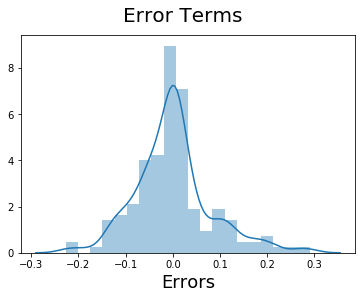

In [59]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)         

## Making Predictions Using the Final Model: Model 5

In [60]:
# Applying scaling on test set for same variables as on train data set
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio','stroke','compressionratio','price','curbweight',
            'enginesize','horsepower','peakrpm','citympg','highwaympg']

In [61]:
car_test[num_vars] = scaler.transform(car_test[num_vars])

In [62]:
# Dividing into  car_test into X_test and y_test
y_test=car_test.pop("price")
X_test=car_test

In [63]:
# Dropping the variables in sync with final train data set
X_test=X_test.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CompName_audi', 'CompName_buick',
       'CompName_chevrolet', 'CompName_dodge', 'CompName_honda',
       'CompName_isuzu', 'CompName_jaguar', 'CompName_mazda',
       'CompName_mercury', 'CompName_mitsubishi', 'CompName_nissan',
       'CompName_peugeot', 'CompName_plymouth', 'CompName_renault',
       'CompName_saab', 'CompName_subaru', 'CompName_toyota',
       'CompName_volkswagen', 'CompName_volvo',"curbweight","carwidth","boreratio","cylindernumber_three"],axis=1)

In [64]:
# Adding constant variable to test dataframe
X_test_m5=sm.add_constant(X_test)

In [65]:
X_test_m5.shape

(41, 7)

In [66]:
# Making predictions using the Model 5

y_pred_m5 = lr5.predict(X_test_m5)

## Model Evaluation

In [67]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred_m5)

0.8456897281912432

Text(0, 0.5, 'y_pred')

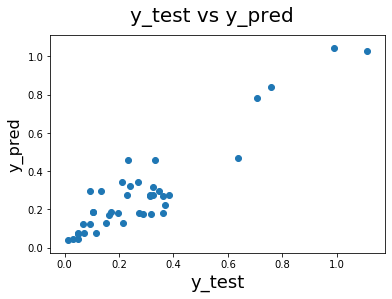

In [68]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

## Conclusion
1. The R square and Adjusted R square value is almost same which is 85.1% and 84.5% respectively which indicates that none of the parameters in Final  model(Model 5) are reduntant.
2. In parallel we also checked removing the outliers and R aquare was coming approximately same. Hence outlier records did not had impact on the linear regression model.This model contain outliers.
3. R square on test data set is 84.5% which is almost same as Adjusted R square obtained from train data set. This indicates linear model is highly reliable
4. Variables that can affect Price are:
   1. CompName_porsche
   2. enginelocation
   3. enginesize
   4. cylindernumber_twelve
   5. CompName_bmw
   6. cylindernumber_two